Attribute Information: 

**age**: continuous.<br>
**workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.<br>
**fnlwgt**: continuous.<br>
**education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.<br>
**education-num**: continuous.<br>
**marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.<br>
**occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.<br>
**relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.<br>
**race**: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.<br>
**sex**: Female, Male.<br>
**capital-gain**: continuous.<br>
**capital-loss**: continuous.<br>
**hours-per-week**: continuous.<br>
**native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.<br>
**class**: >50K, <=50K <br>

In [59]:
#libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import ConfusionMatrixDisplay

**Data import**

In [2]:
train_file_path = (r"D:\Data Science\Projects\age\adult\adult.data")
test_file_path = (r"D:\Data Science\Projects\age\adult\adult.test")

In [3]:
# Specify column names as a list
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'educationnum', 'mstatus', 
                'occupation', 'relationship', 'race', 'sex', 'capitalgain', 'closs', 
                'hpw', 'country', 'class']

In [4]:
data = pd.read_csv(train_file_path, names = column_names)

In [5]:
data_test = pd.read_csv(test_file_path, names= column_names)

**Explainatory Data Analysis**

In [6]:
data.shape

(32561, 15)

In [7]:
data_test.shape

(16282, 15)

So in both test and train dataset there are 15 attributes and in train dataset there are around 32K observations to train the model and 16K observations to test the model.

In [8]:
data.head()

,age,workclass,fnlwgt,education,educationnum,mstatus,occupation,relationship,race,sex,capitalgain,closs,hpw,country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [9]:
data_test.head()

,age,workclass,fnlwgt,education,educationnum,mstatus,occupation,relationship,race,sex,capitalgain,closs,hpw,country,class
0,|1x3 Cross validator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.


In [10]:
data.describe()

,age,fnlwgt,educationnum,capitalgain,closs,hpw
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [11]:
data.describe(include = 'O')

,workclass,education,mstatus,occupation,relationship,race,sex,country,class
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


We can see that the first observation is obsolete and not needed. We can get rid of this.

In [12]:
data_test.iloc[0]

age             |1x3 Cross validator
workclass                        NaN
fnlwgt                           NaN
education                        NaN
educationnum                     NaN
mstatus                          NaN
occupation                       NaN
relationship                     NaN
race                             NaN
sex                              NaN
capitalgain                      NaN
closs                            NaN
hpw                              NaN
country                          NaN
class                            NaN
Name: 0, dtype: object

In [13]:
data_test = data_test.drop(index = 0)

In [14]:
data_test

,age,workclass,fnlwgt,education,educationnum,mstatus,occupation,relationship,race,sex,capitalgain,closs,hpw,country,class
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
5,18,?,103497.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16277,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K.
16278,64,?,321403.0,HS-grad,9.0,Widowed,?,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<=50K.
16279,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
16280,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K.


In [15]:
data_test.shape

(16281, 15)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           32561 non-null  int64 
 1   workclass     32561 non-null  object
 2   fnlwgt        32561 non-null  int64 
 3   education     32561 non-null  object
 4   educationnum  32561 non-null  int64 
 5   mstatus       32561 non-null  object
 6   occupation    32561 non-null  object
 7   relationship  32561 non-null  object
 8   race          32561 non-null  object
 9   sex           32561 non-null  object
 10  capitalgain   32561 non-null  int64 
 11  closs         32561 non-null  int64 
 12  hpw           32561 non-null  int64 
 13  country       32561 non-null  object
 14  class         32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [17]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 1 to 16281
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           16281 non-null  object 
 1   workclass     16281 non-null  object 
 2   fnlwgt        16281 non-null  float64
 3   education     16281 non-null  object 
 4   educationnum  16281 non-null  float64
 5   mstatus       16281 non-null  object 
 6   occupation    16281 non-null  object 
 7   relationship  16281 non-null  object 
 8   race          16281 non-null  object 
 9   sex           16281 non-null  object 
 10  capitalgain   16281 non-null  float64
 11  closs         16281 non-null  float64
 12  hpw           16281 non-null  float64
 13  country       16281 non-null  object 
 14  class         16281 non-null  object 
dtypes: float64(5), object(10)
memory usage: 1.9+ MB


Overall it shows that there are no null values in both train and test datasets. Let's check properly.

In [18]:
data.isna().sum()

age             0
workclass       0
fnlwgt          0
education       0
educationnum    0
mstatus         0
occupation      0
relationship    0
race            0
sex             0
capitalgain     0
closs           0
hpw             0
country         0
class           0
dtype: int64

In [19]:
data_test.isna().sum()

age             0
workclass       0
fnlwgt          0
education       0
educationnum    0
mstatus         0
occupation      0
relationship    0
race            0
sex             0
capitalgain     0
closs           0
hpw             0
country         0
class           0
dtype: int64

In [20]:
data.tail()

,age,workclass,fnlwgt,education,educationnum,mstatus,occupation,relationship,race,sex,capitalgain,closs,hpw,country,class
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


From data_test top 10 sample we can see that there are some values marked as "?". We should know more about that.

In [21]:
data_test.iloc[4]

age                         18
workclass                    ?
fnlwgt                103497.0
education         Some-college
educationnum              10.0
mstatus          Never-married
occupation                   ?
relationship         Own-child
race                     White
sex                     Female
capitalgain                0.0
closs                      0.0
hpw                       30.0
country          United-States
class                   <=50K.
Name: 5, dtype: object

In [22]:
q_count_test = data_test.map(lambda x: isinstance(x, str) and x.strip() == '?').sum()
q_count_test

age               0
workclass       963
fnlwgt            0
education         0
educationnum      0
mstatus           0
occupation      966
relationship      0
race              0
sex               0
capitalgain       0
closs             0
hpw               0
country         274
class             0
dtype: int64

In [23]:
q_count_train = data.map(lambda x: isinstance(x, str) and x.strip() == '?').sum()
q_count_train

age                0
workclass       1836
fnlwgt             0
education          0
educationnum       0
mstatus            0
occupation      1843
relationship       0
race               0
sex                0
capitalgain        0
closs              0
hpw                0
country          583
class              0
dtype: int64

Let's change these to null values

In [24]:
data = data.map(lambda x:np.nan if isinstance(x, str) and x.strip() == '?' else x)
data_test = data_test.map(lambda x:np.nan if isinstance(x, str) and x.strip() == '?' else x)

In [25]:
data.isna().sum()

age                0
workclass       1836
fnlwgt             0
education          0
educationnum       0
mstatus            0
occupation      1843
relationship       0
race               0
sex                0
capitalgain        0
closs              0
hpw                0
country          583
class              0
dtype: int64

In [26]:
data_test.isna().sum()

age               0
workclass       963
fnlwgt            0
education         0
educationnum      0
mstatus           0
occupation      966
relationship      0
race              0
sex               0
capitalgain       0
closs             0
hpw               0
country         274
class             0
dtype: int64

In [27]:
nan_count_train = data.map(lambda x: isinstance(x, str) and x.strip() == 'NaN').sum()
nan_count_train

age             0
workclass       0
fnlwgt          0
education       0
educationnum    0
mstatus         0
occupation      0
relationship    0
race            0
sex             0
capitalgain     0
closs           0
hpw             0
country         0
class           0
dtype: int64

In [28]:
nan_count_test = data_test.map(lambda x: isinstance(x, str) and x.strip() == 'NaN').sum()
nan_count_test

age             0
workclass       0
fnlwgt          0
education       0
educationnum    0
mstatus         0
occupation      0
relationship    0
race            0
sex             0
capitalgain     0
closs           0
hpw             0
country         0
class           0
dtype: int64

In [29]:
percent_missing_train = data.isnull().sum()*100/len(data)
percent_missing_test = data_test.isnull().sum()*100/len(data_test)
percent_missing_train

age             0.000000
workclass       5.638647
fnlwgt          0.000000
education       0.000000
educationnum    0.000000
mstatus         0.000000
occupation      5.660146
relationship    0.000000
race            0.000000
sex             0.000000
capitalgain     0.000000
closs           0.000000
hpw             0.000000
country         1.790486
class           0.000000
dtype: float64

In [30]:
percent_missing_test

age             0.000000
workclass       5.914870
fnlwgt          0.000000
education       0.000000
educationnum    0.000000
mstatus         0.000000
occupation      5.933296
relationship    0.000000
race            0.000000
sex             0.000000
capitalgain     0.000000
closs           0.000000
hpw             0.000000
country         1.682943
class           0.000000
dtype: float64

So we can see that the attributes workclass, occupation and country have null values now which were '?' previously. Let's check the correlation matrix to wee whether they are actually needed or not.

In [31]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educationnum', 'mstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain', 'closs',
       'hpw', 'country', 'class'],
      dtype='object')

In [32]:
data.describe(include = 'O')

,workclass,education,mstatus,occupation,relationship,race,sex,country,class
count,30725,32561,32561,30718,32561,32561,32561,31978,32561
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [33]:
pd.set_option('future.no_silent_downcasting', True)

In [34]:
data['workclass'] = data['workclass'].replace({' State-gov':1, ' Self-emp-not-inc':2, ' Private':3, ' Federal-gov':4,' Local-gov':5, ' Self-emp-inc':6, ' Without-pay':7,' Never-worked':8})
data['education'] = data['education'].replace({' Bachelors':1, ' HS-grad':2, ' 11th':3, ' Masters':4, ' 9th':5,' Some-college':6, ' Assoc-acdm':7, ' Assoc-voc':8, ' 7th-8th':9,' Doctorate':10, ' Prof-school':11, ' 5th-6th':12, ' 10th':13, ' 1st-4th':14,' Preschool':15, ' 12th':16})
data['mstatus'] = data['mstatus'].replace({' Never-married':1, ' Married-civ-spouse':2, ' Divorced':3,' Married-spouse-absent':4, ' Separated':5, ' Married-AF-spouse':6,' Widowed':7})
data['occupation'] = data['occupation'].replace({' Adm-clerical':1, ' Exec-managerial':2, ' Handlers-cleaners':3,' Prof-specialty':4, ' Other-service':5, ' Sales':6, ' Craft-repair':7,' Transport-moving':8, ' Farming-fishing':9, ' Machine-op-inspct':10,' Tech-support':11, ' Protective-serv':12, ' Armed-Forces':13,' Priv-house-serv':14})
data['relationship'] = data['relationship'].replace({' Not-in-family':1, ' Husband':2, ' Wife':3, ' Own-child':4, ' Unmarried':5,' Other-relative':6})
data['race'] = data['race'].replace({' White':1, ' Black':2, ' Asian-Pac-Islander':3, ' Amer-Indian-Eskimo':4,' Other':5})
data['sex'] = data['sex'].replace({' Male':1, ' Female':2})
data['country'] = data['country'].replace({' United-States':1, ' Cuba':2, ' Jamaica':3, ' India':4, ' Mexico':5,' South':6, ' Puerto-Rico':7, ' Honduras':8, ' England':9, ' Canada':10,' Germany':11, ' Iran':12, ' Philippines':13, ' Italy':14, ' Poland':15,' Columbia':16, ' Cambodia':17, ' Thailand':18, ' Ecuador':19, ' Laos':20,' Taiwan':21, ' Haiti':22, ' Portugal':23, ' Dominican-Republic':24,' El-Salvador':25, ' France':26, ' Guatemala':27, ' China':28, ' Japan':29,' Yugoslavia':30, ' Peru':31, ' Outlying-US(Guam-USVI-etc)':32, ' Scotland':33,' Trinadad&Tobago':34, ' Greece':35, ' Nicaragua':36, ' Vietnam':37, ' Hong':38,' Ireland':39, ' Hungary':40, ' Holand-Netherlands':41})
data['class'] = data['class'].replace({' <=50K':1, ' >50K':2})

In [35]:
data_test['workclass'] = data_test['workclass'].replace({' State-gov':1, ' Self-emp-not-inc':2, ' Private':3, ' Federal-gov':4,' Local-gov':5, ' Self-emp-inc':6, ' Without-pay':7,' Never-worked':8})
data_test['education'] = data_test['education'].replace({' Bachelors':1, ' HS-grad':2, ' 11th':3, ' Masters':4, ' 9th':5,' Some-college':6, ' Assoc-acdm':7, ' Assoc-voc':8, ' 7th-8th':9,' Doctorate':10, ' Prof-school':11, ' 5th-6th':12, ' 10th':13, ' 1st-4th':14,' Preschool':15, ' 12th':16})
data_test['mstatus'] = data_test['mstatus'].replace({' Never-married':1, ' Married-civ-spouse':2, ' Divorced':3,' Married-spouse-absent':4, ' Separated':5, ' Married-AF-spouse':6,' Widowed':7})
data_test['occupation'] = data_test['occupation'].replace({' Adm-clerical':1, ' Exec-managerial':2, ' Handlers-cleaners':3,' Prof-specialty':4, ' Other-service':5, ' Sales':6, ' Craft-repair':7,' Transport-moving':8, ' Farming-fishing':9, ' Machine-op-inspct':10,' Tech-support':11, ' Protective-serv':12, ' Armed-Forces':13,' Priv-house-serv':14})
data_test['relationship'] = data_test['relationship'].replace({' Not-in-family':1, ' Husband':2, ' Wife':3, ' Own-child':4, ' Unmarried':5,' Other-relative':6})
data_test['race'] = data_test['race'].replace({' White':1, ' Black':2, ' Asian-Pac-Islander':3, ' Amer-Indian-Eskimo':4,' Other':5})
data_test['sex'] = data_test['sex'].replace({' Male':1, ' Female':2})
data_test['country'] = data_test['country'].replace({' United-States':1, ' Cuba':2, ' Jamaica':3, ' India':4, ' Mexico':5,' South':6, ' Puerto-Rico':7, ' Honduras':8, ' England':9, ' Canada':10,' Germany':11, ' Iran':12, ' Philippines':13, ' Italy':14, ' Poland':15,' Columbia':16, ' Cambodia':17, ' Thailand':18, ' Ecuador':19, ' Laos':20,' Taiwan':21, ' Haiti':22, ' Portugal':23, ' Dominican-Republic':24,' El-Salvador':25, ' France':26, ' Guatemala':27, ' China':28, ' Japan':29,' Yugoslavia':30, ' Peru':31, ' Outlying-US(Guam-USVI-etc)':32, ' Scotland':33,' Trinadad&Tobago':34, ' Greece':35, ' Nicaragua':36, ' Vietnam':37, ' Hong':38,' Ireland':39, ' Hungary':40, ' Holand-Netherlands':41})
data_test['class'] = data_test['class'].replace({' <=50K.':1, ' >50K.':2})

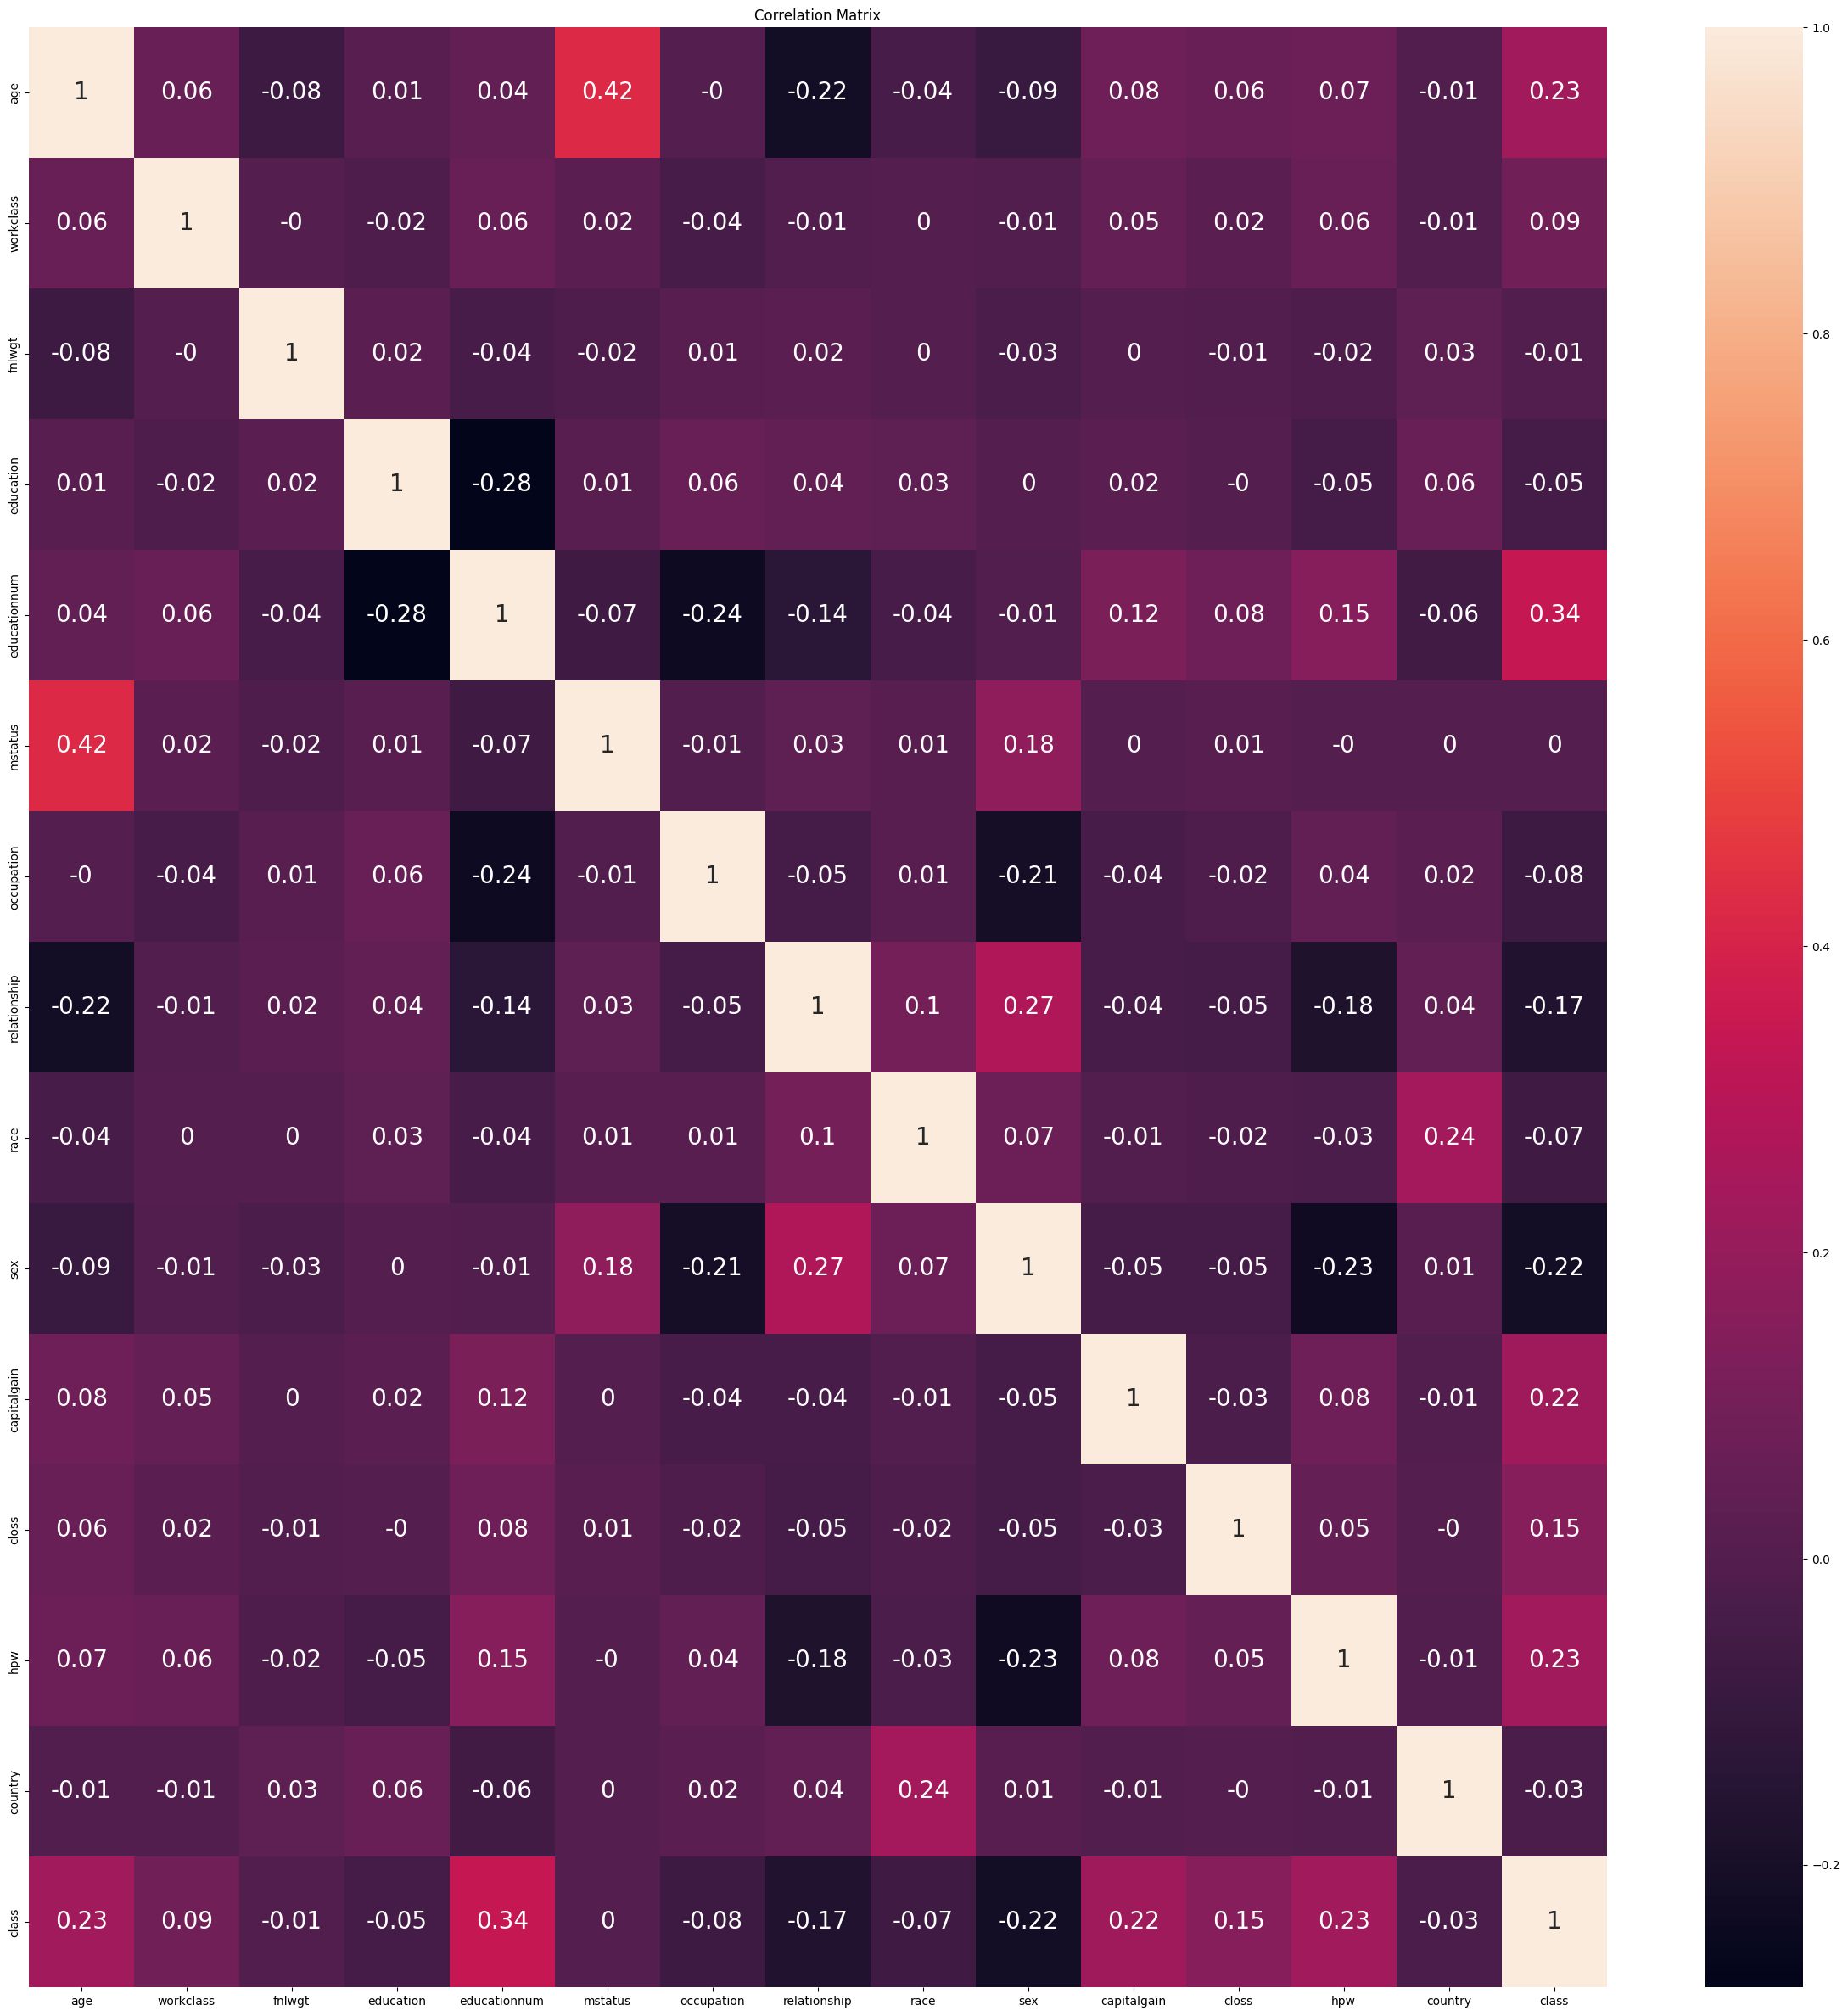

In [36]:
fig, ax = plt.subplots(figsize =(30,30))
sns.heatmap(data.corr().round(2), annot = True, annot_kws = {"size":20})
plt.title("Correlation Matrix")
plt.show()

So we don't have any multicollinearity problem with our dataset and none of the attributes are not much correlated to each others.

In [37]:
data.describe(include= 'O')

,workclass,education,mstatus,occupation,relationship,race,sex,country,class
count,30725,32561,32561,30718,32561,32561,32561,31978,32561
unique,8,16,7,14,6,5,2,41,2
top,3,2,2,4,2,1,1,1,1
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [38]:
data_test.describe(include= 'O')

,age,workclass,education,mstatus,occupation,relationship,race,sex,country,class
count,16281,15318,16281,16281,15315,16281,16281,16281,16007,16281
unique,73,8,16,7,14,6,5,2,40,2
top,35,3,2,2,4,2,1,1,1,1
freq,461,11210,5283,7403,2032,6523,13946,10860,14662,12435


In [70]:
data = data.dropna(axis = 0, how = 'any')

In [71]:
data.isna().sum()

age             0
workclass       0
fnlwgt          0
education       0
educationnum    0
mstatus         0
occupation      0
relationship    0
race            0
sex             0
capitalgain     0
closs           0
hpw             0
country         0
class           0
dtype: int64

In [73]:
data_test = data_test.dropna( axis = 0, how = 'any')

In [74]:
data_test.shape

(15060, 15)

In [75]:
# Splitting features (X) and target variable (y)
X_train = data.drop(columns=['class'])  # Replace 'age' with the actual target column name
y_train = data['class']

In [76]:
# Splitting features (X) and target variable (y)
X_test = data_test.drop(columns=['class'])
y_test = data_test['class']

In [85]:
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)  # Encode labels as integers
y_test = encoder.transform(y_test)        # Apply the same transformation

In [86]:
# Preprocessing steps
standardization = StandardScaler()
normalization = Normalizer()

In [87]:
# Define pipelines for Random Forest and Logistic Regression
models = {
    'random_forest': RandomForestClassifier(random_state=42),
    'logistic_regression': LogisticRegression(max_iter=1000, random_state=42)
}

In [88]:
pipelines = {
    'no_processing': {
        'random_forest': Pipeline([('model', RandomForestClassifier(random_state=42))]),
        'logistic_regression': Pipeline([('model', LogisticRegression(max_iter=33000, solver='saga', random_state=42))])
    },
    'standardization': {
        'random_forest': Pipeline([('scaler', StandardScaler()), ('model', RandomForestClassifier(random_state=42))]),
        'logistic_regression': Pipeline([('scaler', StandardScaler()), ('model', LogisticRegression(max_iter=33000, solver='saga', random_state=42))])
    },
    'normalization': {
        'random_forest': Pipeline([('scaler', Normalizer()), ('model', RandomForestClassifier(random_state=42))]),
        'logistic_regression': Pipeline([('scaler', Normalizer()), ('model', LogisticRegression(max_iter=33000, solver='saga', random_state=42))])
    },
    'standardization+normalization': {
        'random_forest': Pipeline([('scaler', StandardScaler()), ('normalizer', Normalizer()), ('model', RandomForestClassifier(random_state=42))]),
        'logistic_regression': Pipeline([('scaler', StandardScaler()), ('normalizer', Normalizer()), ('model', LogisticRegression(max_iter=33000, solver='saga', random_state=42))])
    }
}

In [89]:
results = {}

Evaluating random_forest...
random_forest with no_processing: Accuracy = 0.8505, AUC = 0.9012
Confusion Matrix for random_forest with no_processing:
[[10533   827]
 [ 1424  2276]]



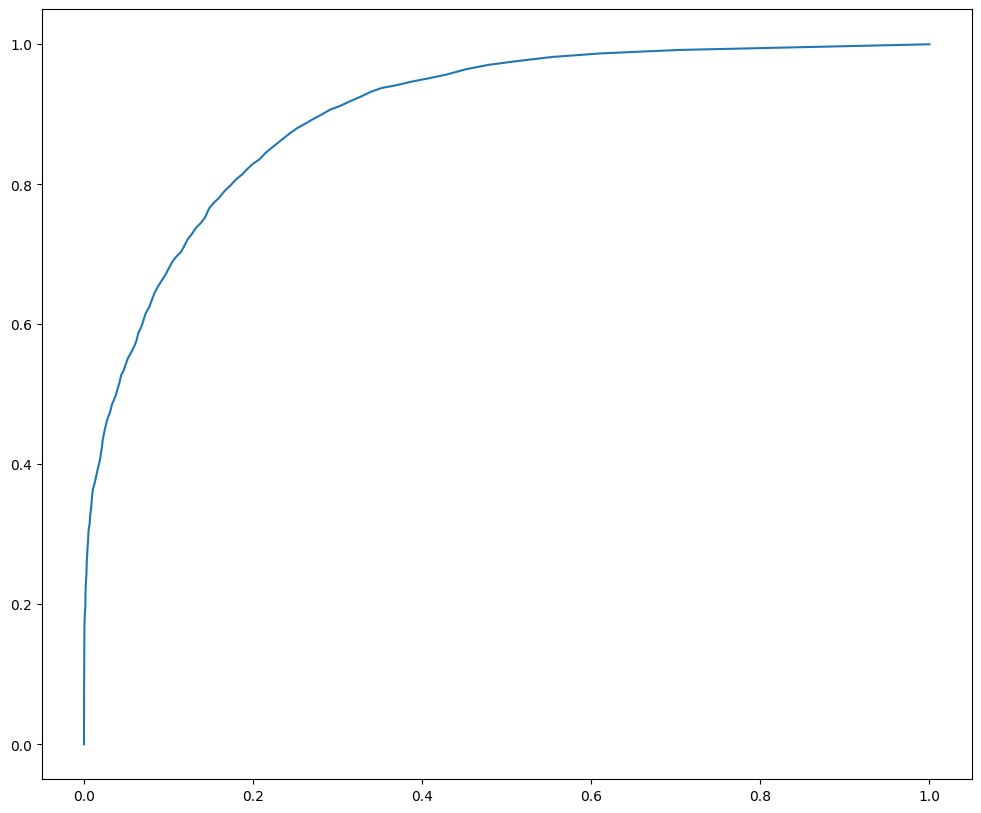

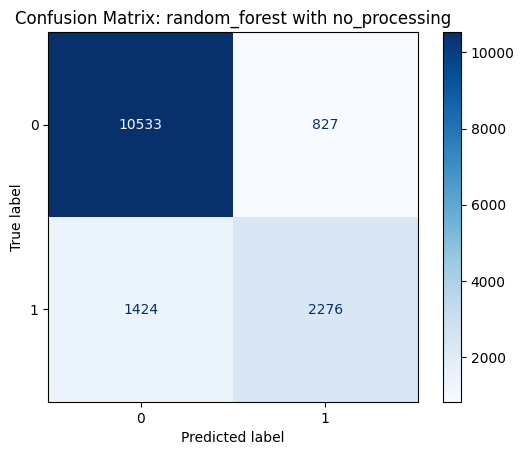

random_forest with standardization: Accuracy = 0.8504, AUC = 0.9012
Confusion Matrix for random_forest with standardization:
[[10521   839]
 [ 1414  2286]]



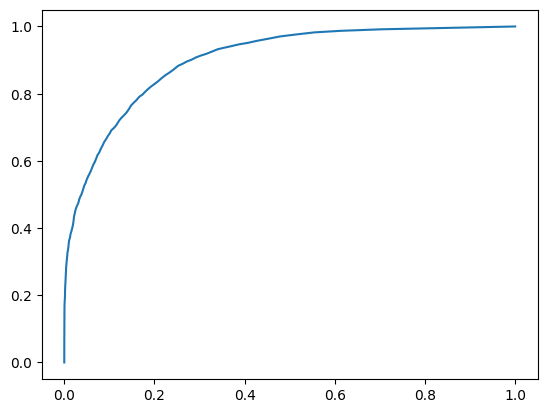

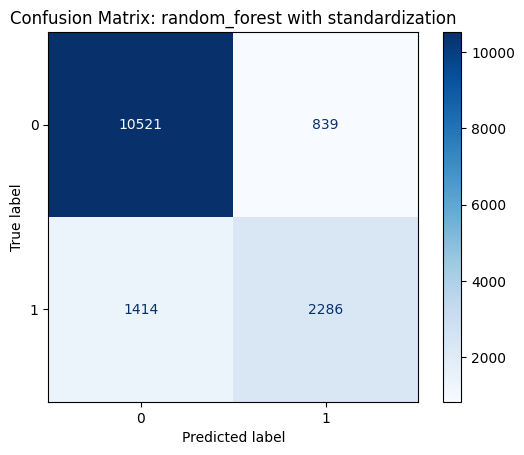

random_forest with normalization: Accuracy = 0.8358, AUC = 0.8845
Confusion Matrix for random_forest with normalization:
[[10618   742]
 [ 1731  1969]]



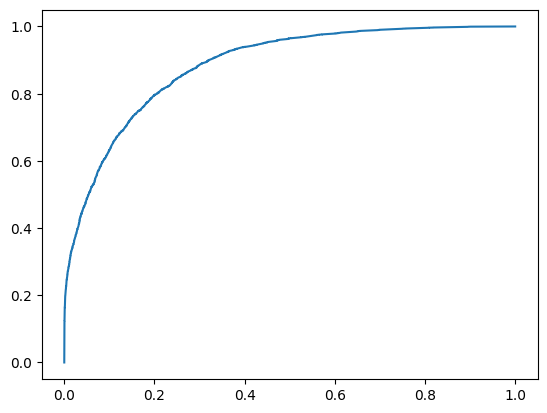

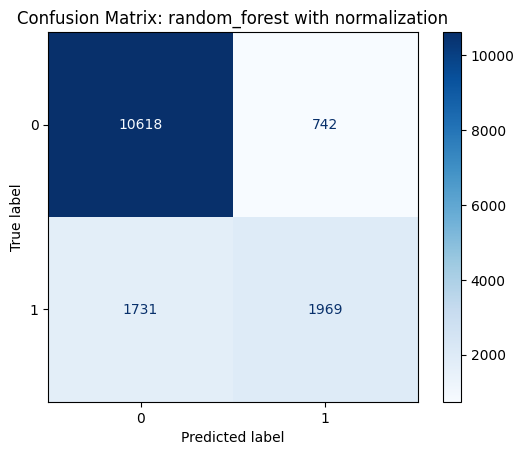

random_forest with standardization+normalization: Accuracy = 0.8413, AUC = 0.8946
Confusion Matrix for random_forest with standardization+normalization:
[[10460   900]
 [ 1490  2210]]



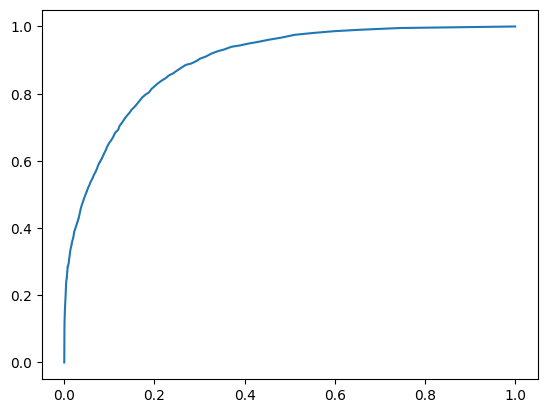

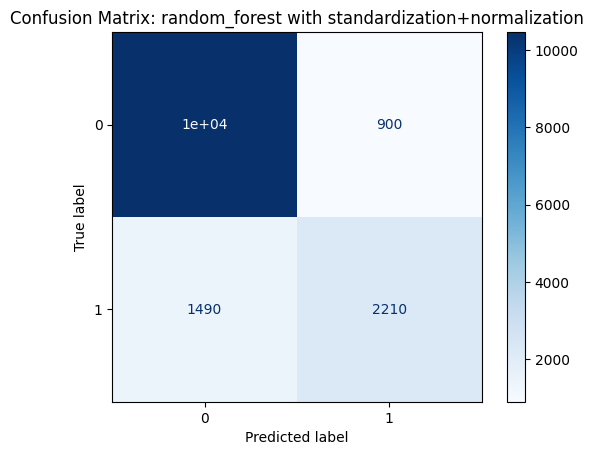

Evaluating logistic_regression...
logistic_regression with no_processing: Accuracy = 0.7900, AUC = 0.6206
Confusion Matrix for logistic_regression with no_processing:
[[10950   410]
 [ 2753   947]]



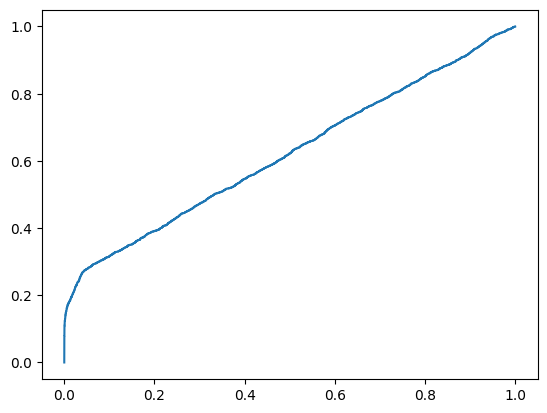

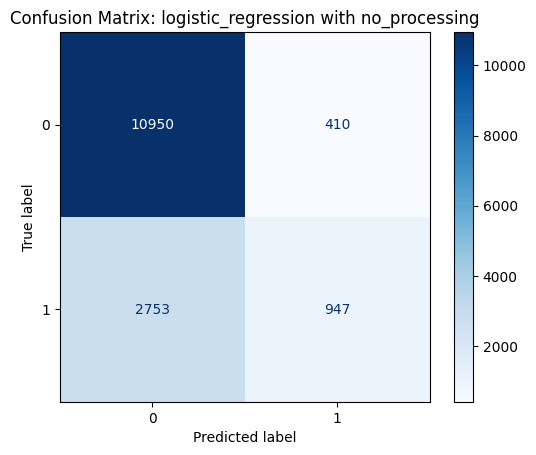

logistic_regression with standardization: Accuracy = 0.8181, AUC = 0.8423
Confusion Matrix for logistic_regression with standardization:
[[10659   701]
 [ 2039  1661]]



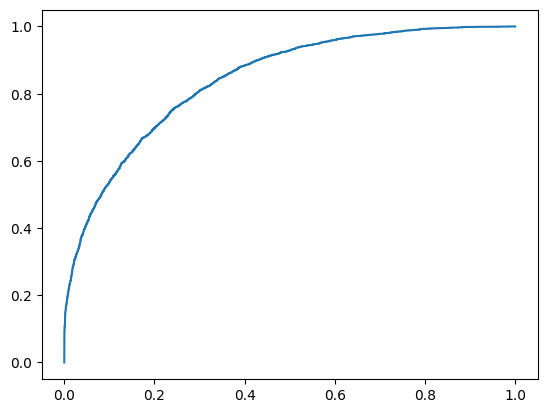

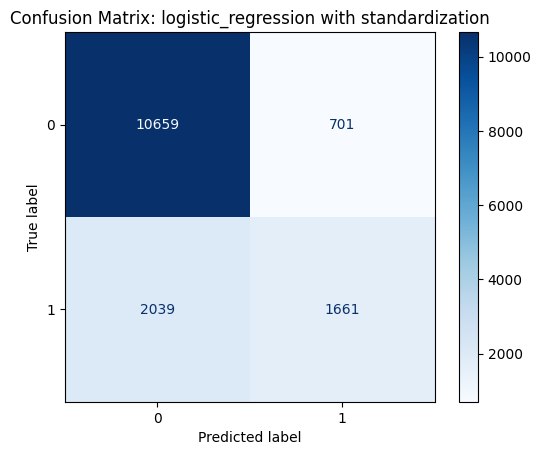

logistic_regression with normalization: Accuracy = 0.7761, AUC = 0.6779
Confusion Matrix for logistic_regression with normalization:
[[11311    49]
 [ 3323   377]]



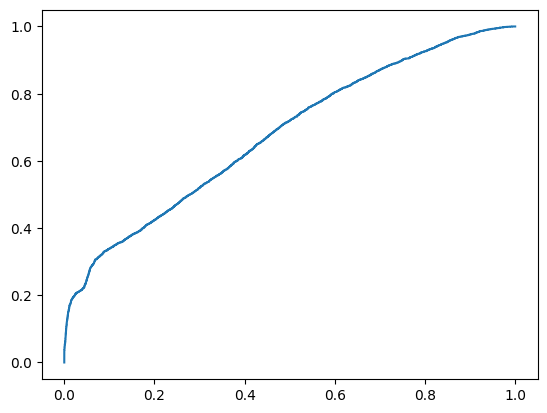

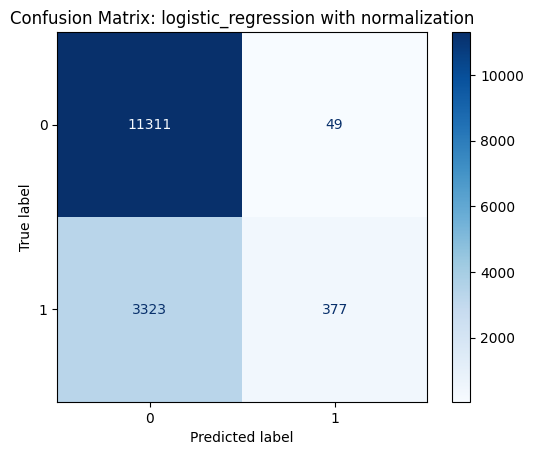

logistic_regression with standardization+normalization: Accuracy = 0.8203, AUC = 0.8405
Confusion Matrix for logistic_regression with standardization+normalization:
[[10580   780]
 [ 1926  1774]]



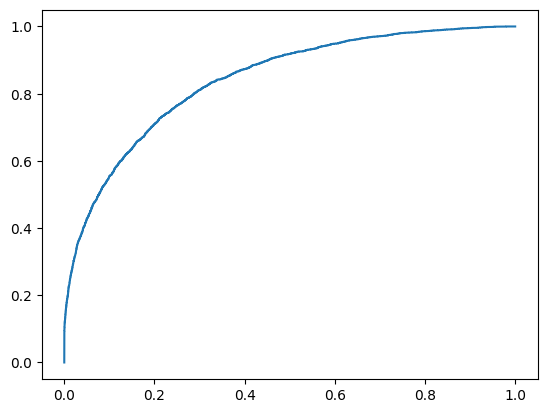

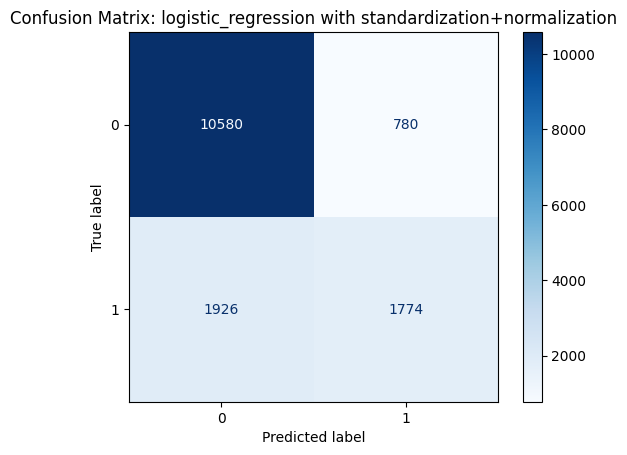

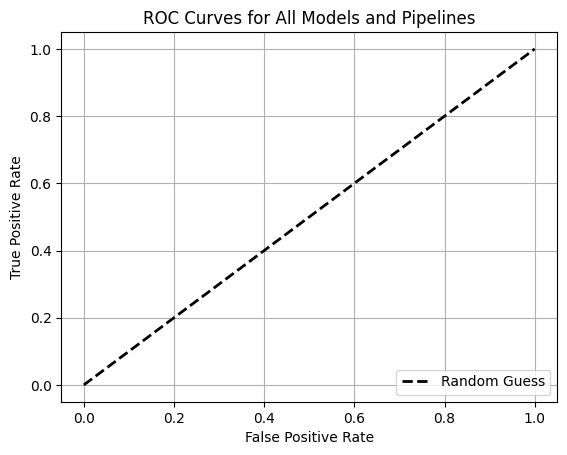

In [92]:
# Plot setup for ROC curves
plt.figure(figsize=(12, 10))

# Iterate over models and their corresponding pipelines
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")

    for preprocessing_name, pipeline in pipelines.items():
        # Ensure the same training data is used for all models
        X_train_model = X_train  # Use the processed X_train
        y_train_model = y_train
        X_test_model = X_test    # Use the processed X_test
        y_test_model = y_test

        # Get the model pipeline for the current preprocessing method
        model_pipeline = pipeline[model_name]

        try:
            # Fit the model pipeline
            model_pipeline.fit(X_train_model, y_train_model)
            
            # Predict
            y_pred = model_pipeline.predict(X_test_model)
            y_proba = model_pipeline.predict_proba(X_test_model)[:, 1]  # Get probabilities for AUC
            
            # Compute metrics
            accuracy = accuracy_score(y_test_model, y_pred)
            fpr, tpr, _ = roc_curve(y_test_model, y_proba)
            roc_auc = auc(fpr, tpr)
            cm = confusion_matrix(y_test_model, y_pred)

            # Store results
            if model_name not in results:
                results[model_name] = {}
            results[model_name][preprocessing_name] = {
                'accuracy': accuracy,
                'auc': roc_auc,
                'confusion_matrix': cm
            }
            
            # Print accuracy and AUC
            print(f"{model_name} with {preprocessing_name}: Accuracy = {accuracy:.4f}, AUC = {roc_auc:.4f}")
            print(f"Confusion Matrix for {model_name} with {preprocessing_name}:\n{cm}\n")
            
            # Plot ROC curve for each preprocessing method
            plt.plot(fpr, tpr, label=f"{model_name} - {preprocessing_name} (AUC = {roc_auc:.4f})")
            
            # Plot confusion matrix
            disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_pipeline.classes_)
            disp.plot(cmap='Blues')
            plt.title(f"Confusion Matrix: {model_name} with {preprocessing_name}")
            plt.show()
            
        except Exception as e:
            print(f"Error for {model_name} with {preprocessing_name}: {e}")

# Plot ROC curves for all models
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models and Pipelines')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [94]:
# Prepare a list to store the results for each model and pipeline
model_performance = []

In [95]:
# Iterate over the results dictionary to extract the performance metrics
for model_name, preprocessing_results in results.items():
    for preprocessing_name, metrics in preprocessing_results.items():
        model_performance.append({
            'Model': model_name,
            'Preprocessing': preprocessing_name,
            'Accuracy': metrics['accuracy'],
            'AUC': metrics['auc'],
            'Confusion Matrix': metrics['confusion_matrix']
        })

In [96]:
# Create a DataFrame for easier comparison
performance_df = pd.DataFrame(model_performance)

In [97]:
# Display the performance comparison
print(performance_df)

                 Model                  Preprocessing  Accuracy       AUC  \
0        random_forest                  no_processing  0.850531  0.901180   
1        random_forest                standardization  0.850398  0.901227   
2        random_forest                  normalization  0.835790  0.884480   
3        random_forest  standardization+normalization  0.841301  0.894572   
4  logistic_regression                  no_processing  0.789973  0.620629   
5  logistic_regression                standardization  0.818061  0.842322   
6  logistic_regression                  normalization  0.776096  0.677910   
7  logistic_regression  standardization+normalization  0.820319  0.840545   

               Confusion Matrix  
0  [[10533, 827], [1424, 2276]]  
1  [[10521, 839], [1414, 2286]]  
2  [[10618, 742], [1731, 1969]]  
3  [[10460, 900], [1490, 2210]]  
4   [[10950, 410], [2753, 947]]  
5  [[10659, 701], [2039, 1661]]  
6    [[11311, 49], [3323, 377]]  
7  [[10580, 780], [1926, 1774]]  


In [98]:
# Find the best model and pipeline combination based on AUC
best_model_auc = performance_df.loc[performance_df['AUC'].idxmax()]
print(f"\nBest Model based on AUC:\n{best_model_auc}")


Best Model based on AUC:
Model                              random_forest
Preprocessing                    standardization
Accuracy                                0.850398
AUC                                     0.901227
Confusion Matrix    [[10521, 839], [1414, 2286]]
Name: 1, dtype: object
